Importing important libraries


In [1]:
import pandas as pd
import numpy as np
import os
import requests
from io import BytesIO
import tweepy
import re
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Gathring Data (1)
Download the file manually then read into a dataframe with an appropriate name using the pandas library.

In [2]:
df_1 = pd.read_csv('work_directory/twitter-archive-enhanced.csv')

# Gathring Data (2)
- Downloaded programmatically using the Requests library and the provided URL.
- Store the data to anew file with name extracted from the URL.
- read the data and assign it to a new data frame.

In [3]:
folder_name ='work_directory'
#Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open (os.path.join(folder_name, url.split('/')[-1]),mode = 'wb') as file:
     file.write(r.content)

In [5]:
df_2 = pd.read_csv('work_directory/image-predictions.tsv',sep = '\s+')

# Gather (3)
- Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library.
- Store each tweet's entire set of JSON data in a file called tweet_json.txt file.
- Each tweet's JSON data should be written to its own line and seprated by '\n'.
- Because of there may be some deleted tweets for which no status would be found then try-except statment should be used to avoid exceptions.
- append such not found tweet_ids to an empty list to know how many tweets in archive data set was not found.

In [6]:
consumer_key =    '********************************'

consumer_secret = '********************************'

access_token =    '********************************'

access_secret =    '*******************************'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_list = []
start = timer()
if not os.path.isfile('work_directory/tweet_json.txt'):
    with open('work_directory/tweet_json.txt', 'w') as file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, file) # Save each tweet's returned JSON as a new line in a .txt file
                file.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_list.append(tweet_id)
                pass
end = timer()

In [7]:
len(fails_list)

0

# Gather (3) continue
- Read this tweet_json.txt file line by line. 
- convert string type to list of dictionaries data structur.
- Extract data required as per project requirement
- DataFrame contains tweet ID,retweet count, and favorite count.

In [8]:
df3_list = []
with open ('work_directory/tweet_json.txt',"r") as j_file:
    for l in j_file:
        dic = {}
        data=json.loads(l)
        dic['id'] = data['id']
        dic['favorite_count'] = data['favorite_count']
        dic['retweet_count'] = data['retweet_count']
        dic['followers_count'] = data['user']['followers_count']
        df3_list.append(dic)
print(data.keys())

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [9]:
df_3 = pd.DataFrame(df3_list,columns = ['id','retweet_count','favorite_count','followers_count',])

In [10]:
df_3.to_csv('work_directory/tweet1.csv')

In [11]:
df_3 = pd.read_csv('work_directory/tweet1.csv')
len(df_3)

2330

# Assesment

In [12]:
df_1.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1773,678255464182861824,NaN,NaN,2015-12-19 16:47:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,None,None,None,None
2323,666428276349472768,NaN,NaN,2015-11-17 01:30:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Austrian Pulitzer. Collectors ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666428276...,7,10,None,None,None,None,None
877,760893934457552897,NaN,NaN,2016-08-03 17:43:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wishes. He has the day off. Daily stru...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760893934...,11,10,Wishes,doggo,None,None,None
1156,724771698126512129,NaN,NaN,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724771698...,11,10,None,doggo,None,None,None
278,840268004936019968,NaN,NaN,2017-03-10 18:27:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monty. He makes instantly regrettable ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840268004...,12,10,Monty,None,None,None,None
1580,687127927494963200,NaN,NaN,2016-01-13 04:23:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gordon. He's an asshole. 9/10 would still...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687127927...,9,10,Gordon,None,None,None,None
1313,706904523814649856,NaN,NaN,2016-03-07 18:09:06 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Ever seen a dog pet another dog? Both 13/10 tr...,NaN,NaN,NaN,https://vine.co/v/iXQAm5Lrgrh,13,10,None,None,None,None,None
1393,700029284593901568,NaN,NaN,2016-02-17 18:49:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. His ship is taking on water. So...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700029284...,10,10,Coops,None,None,None,None
304,836380477523124226,NaN,NaN,2017-02-28 01:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She just blasted off. Streamline ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836380477...,12,10,Ava,None,None,pupper,None
853,765371061932261376,NaN,NaN,2016-08-16 02:14:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's had a long day. Did a lot ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765371061...,11,10,Louie,None,None,pupper,None


In [13]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
df_1.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Augie         1
Fido          1
Kona          1
Jennifur      1
Pepper        1
Name: name, Length: 957, dtype: int64

In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
df_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
509,676101918813499392,https://pbs.twimg.com/media/CWH_FTgWIAAwOUy.jpg,1,Shih-Tzu,0.225848,True,Norfolk_terrier,0.186873,True,Irish_terrier,0.106987,True
1156,733460102733135873,https://pbs.twimg.com/media/Ci3GDeyUoAAKOxn.jpg,1,chow,0.931275,True,beaver,0.028831,False,dhole,0.017379,False
810,692187005137076224,https://pbs.twimg.com/media/CZskaEIWIAUeTr5.jpg,2,Siberian_husky,0.810592,True,malamute,0.119745,True,Eskimo_dog,0.029265,True
369,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False
355,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True


In [17]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
df_2.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_3.sample(5)

,Unnamed: 0,id,retweet_count,favorite_count,followers_count
1775,1775,676975532580409345,1016,2645,8941422
453,453,816829038950027264,4633,0,8941397
200,200,852311364735569921,9360,31617,8941394
548,548,802265048156610565,1363,6877,8941398
1286,1286,707038192327901184,756,2116,8941417


In [21]:
df_3.describe()

,Unnamed: 0,id,retweet_count,favorite_count,followers_count
count,2330.000000,2.330000e+03,2330.000000,2330.000000,2.330000e+03
mean,1164.500000,7.419381e+17,2610.340343,7355.005150,8.941412e+06
std,672.757386,6.823077e+16,4415.199850,11421.365768,1.428663e+01
min,0.000000,6.660209e+17,1.000000,0.000000,8.941392e+06
25%,582.250000,6.782926e+17,529.250000,1279.500000,8.941398e+06
50%,1164.500000,7.183508e+17,1219.500000,3191.500000,8.941415e+06
75%,1746.750000,7.986712e+17,3028.750000,8998.000000,8.941422e+06
max,2329.000000,8.924206e+17,74967.000000,151537.000000,8.941503e+06


In [22]:
df_3.followers_count.value_counts()

8941429    220
8941394    179
8941406    178
8941419    159
8941422    142
8941418    139
8941393    125
8941395    105
8941397     85
8941421     83
8941416     82
8941417     74
8941408     73
8941430     73
8941404     70
8941398     59
8941400     48
8941399     48
8941427     42
8941401     38
8941409     35
8941420     29
8941415     28
8941396     27
8941425     25
8941426     24
8941414     22
8941424     18
8941413     17
8941428     15
8941403     13
8941423     11
8941392      6
8941405      6
8941402      6
8941467      3
8941407      3
8941501      2
8941431      2
8941495      2
8941503      2
8941472      2
8941480      2
8941490      2
8941469      1
8941473      1
8941491      1
8941492      1
8941468      1
8941502      1
Name: followers_count, dtype: int64

## Quality issues:
### df_1 :
- As per the project requirements; only original ratings (no retweets) that have images should be included
- Columns of retweeted_status_id and its related data have entries which not part of our analysis.
- Inaccurate data in name 'a' represented 55 times.
- Inaccurate data in rating_nominator and df_denominator.
- Null values reprsened as "None" in columns doggo, floofer, pupper, puppo.
- Invalid dtype in timestamp represented as object type.
- Column tweet_id represented as int64 across all data set.
### df_2 :
- Columns of predictions have lables represented as letters.
- Column 'p1_dog' have 543 false prediction, p2_dog have 522 false prediction, p3_dog have 576 false prediction. 
- Column 'p1' have invalid data like(china_cabinet, shield, orange, walking_stick,...etc).
- Column 'p2' have invalid data like(ice_lolly, Japanese_spaniel, china_cabinet, necklace,...etc).
- Column 'p3' have invalid data like(kimono, cab, axolotl, passenger_car, tripod, grocery_store,...etc).
## Tidness issues:
### df_1:
- Variable dog stages have four columns.
### df_2:
- Variable prediction have three columns.
### df_3:
- Table df3_clean have same observation unit that in df1_clean.
- Column name id in stead of tweet_id.

# Cleaning

befor cleaning copying DataFrames in pandas is done using `.copy` method

In [23]:
df1_clean = df_1.copy()
df1_clean.shape

(2356, 17)

In [24]:
df2_clean = df_2.copy()
df2_clean.shape

(2075, 12)

In [25]:
df3_clean = df_3.copy()
df3_clean.shape

(2330, 5)

### Define
##### df3_clean Column name 'id' in stead of 'tweet_id'.

In [26]:
df3_clean.rename(columns={'id': 'tweet_id'},inplace =True)

### Test

In [27]:
df3_clean.sample()

,Unnamed: 0,tweet_id,retweet_count,favorite_count,followers_count
792,792,771136648247640064,2857,8987,8941404


### Define
##### Null values reprsened as "None" in columns doggo, floofer, pupper, puppo.
use replace function to replace it with""

In [28]:
df1_clean.iloc[:,-4:] = df1_clean.iloc[:,-4:].replace('None','')

### Test

In [29]:
print(df1_clean.shape)
df1_clean.loc[:,['doggo','pupper','floofer','puppo']].sample(5)

(2356, 17)


,doggo,pupper,floofer,puppo
8,,,,
1154,,,,
1153,,,,
2276,,,,
339,doggo,,,


### Define
##### Variable dog stages have four columns
- creat a new column 'dog_stages' that contain all stages of every dog.
-  drop the old columns

In [30]:
df1_clean['dog_stages'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo

In [31]:
df1_clean.drop(columns =['doggo', 'floofer', 'pupper', 'puppo'] , inplace = True)

### Test

In [32]:
df1_clean.shape

(2356, 14)

### Define
##### Inaccurate data in name 'a' represented 55 times.
Extract the correct name using REG expression

In [33]:
short_name = df1_clean [df1_clean.name.str.len() < 3 ]
short_name.name

56       a
393     Mo
446     Bo
449     Bo
553     Bo
        ..
2349    an
2350     a
2352     a
2353     a
2354     a
Name: name, Length: 79, dtype: object

In [34]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in df1_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('an', c_name)
        elif row['name'] == 'O':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('O', c_name)
        elif row['name'] == 'Al':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('Al', c_name)
        elif row['name'] == 'my':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('my', c_name)
        elif row['name'] == 'by':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('by', c_name)
        elif row['name'] == 'Ed':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('Ed', c_name)
        elif row['name'] == 'Jo':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('Jo', c_name)
        elif row['name'] == 'JD':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('JD', c_name)
        elif row['name'] == 'None':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('None', c_name)
        elif row['name'] == "Mo":
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('Mo', c_name)
        elif row['name'] == 'Bo':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('Bo', c_name)
        elif row['name'] == 'to':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('to', c_name)
    except IndexError:
        df1_clean.loc[index,'name'] = np.nan

### Test

In [35]:
# Test for short name
short_name = df1_clean [df1_clean.name.str.len() < 3 ]
short_name.name

149     to
2086    of
Name: name, dtype: object

In [36]:
# Test for None 
(df1_clean.name=='None').sum()

0

### Define

##### As per the project requirements; only original ratings (no retweets) that have images should be included

In [37]:
#Use the image_prediction table to guide the selection and removal of tweets without images in the archive table
tweets_with_image = list(df2_clean.tweet_id.unique())
len(tweets_with_image)

2075

In [38]:
# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == df1_clean.tweet_id.isin(tweets_with_image).sum()

True

In [39]:
# Cleaning df1_clean
df1_clean = df1_clean[df1_clean.tweet_id.isin(tweets_with_image)]

### Test

In [40]:
print(df1_clean.shape)
print(df2_clean.shape)
print(df3_clean.shape)
df1_clean.shape[0] == df2_clean.shape[0]

(2075, 14)
(2075, 12)
(2330, 5)


True

### Define

##### Columns of retweeted_status_id and its related data have entries which not part of our analysis.
###### Use its notnull data to drop retweets and replies then drop it all in df1_clean and df3_clean.

In [41]:
# extract the tweets that include data in the retweet_status_id.
retweet_entries = df1_clean.retweeted_status_id.notnull()
df1_clean[retweet_entries].shape[0]

81

In [42]:
# Dropping the retweets from the archive data set
df1_clean = df1_clean[~retweet_entries]

In [43]:
# Extracting replies entries with the same method as the retweets
reply_entries = df1_clean.in_reply_to_status_id.notnull()
df1_clean[reply_entries].shape[0]

23

In [44]:
# Dropping the replies from the df1_clean set
df1_clean = df1_clean[~reply_entries]

In [45]:
# Check the image_prediction table df2_clean for extra tweet ids not in the df1_clean
np.logical_not(df2_clean.tweet_id.isin(list(df1_clean.tweet_id))).sum()

104

In [46]:
# Dropping the retweets and replies ids from the image prediction dataframe df2_clean
df2_clean = df2_clean[~np.logical_not(df2_clean.tweet_id.isin(list(df1_clean.tweet_id)))]

In [47]:
# Check the df3_clean table for extra tweet ids not in the df1_clean
np.logical_not(df3_clean.tweet_id.isin(list(df1_clean.tweet_id))).sum()

366

In [48]:
# Dropping the retweets and replies ids from the dataframe df3_clean
df3_clean = df3_clean[~np.logical_not(df3_clean.tweet_id.isin(list(df1_clean.tweet_id)))]

In [49]:
#Dropping columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1,inplace=True)

### Test

In [50]:
print(df1_clean.shape)
print(df2_clean.shape)
print(df3_clean.shape)

(1971, 9)
(1971, 12)
(1964, 5)


In [51]:
print((df1_clean[retweet_entries].shape[0])==0)
print((df1_clean[reply_entries].shape[0])==0)
print(np.logical_not((df2_clean.tweet_id.isin(list(df1_clean.tweet_id))).sum())==0)

True
True
True


<ipython-input-51-c0f698a2d89c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print((df1_clean[retweet_entries].shape[0])==0)
<ipython-input-51-c0f698a2d89c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print((df1_clean[reply_entries].shape[0])==0)


In [52]:
df1_clean = df1_clean.reset_index(drop=True)
df1_clean.index

RangeIndex(start=0, stop=1971, step=1)

In [53]:
df2_clean = df2_clean.reset_index(drop=True)
df2_clean.index

RangeIndex(start=0, stop=1971, step=1)

In [54]:
df3_clean = df3_clean.reset_index(drop=True)
df3_clean.index

RangeIndex(start=0, stop=1964, step=1)

In [55]:
df1_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
372,813051746834595840,2016-12-25 16:00:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bauer. He had nothing to do with the c...,https://twitter.com/dog_rates/status/813051746...,13,10,Bauer,
800,739844404073074688,2016-06-06 15:40:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Simba. He's the grand prize. The troph...,https://twitter.com/dog_rates/status/739844404...,12,10,Simba,


In [56]:
df2_clean.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1070,719332531645071360,https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg,1,Dandie_Dinmont,0.224415,True,miniature_poodle,0.204882,True,Norfolk_terrier,0.090633,True
583,679475951516934144,https://pbs.twimg.com/media/CW37xZbUoAAUXe5.jpg,1,Maltese_dog,0.145742,True,toy_poodle,0.139407,True,West_Highland_white_terrier,0.108821,True


In [57]:
df3_clean.sample(2)

,Unnamed: 0,tweet_id,retweet_count,favorite_count,followers_count
53,59,880465832366813184,5478,26015,8941394
676,906,754482103782404096,1897,5154,8941406


### Define

##### Invalid dtype in timestamp represented as object type.

In [58]:
#convert timestamp to date time type 
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

### Test

In [59]:
df1_clean.timestamp.dtypes

datetime64[ns, UTC]

### Define

##### Inaccurate data in rating_numerator and df_denominator.
##### the denominator should always be 10 but some aren't in all cases So dividing by it or not doesn't mattar.
##### we are going to drop denominator later and just use the rating_numerator as the rating value.
##### some rating extracted incorrectly 
- extract it with REGS

##### Most images with more than dog have denominator greater than 10 and numerator greater than 20.
- Calculating the dogs counts in the tweets featuring many dogs by dividing denominator/10
- Calculating the rating_numerator for images with more than one dog counts by dividing numerator/dogs counts

##### investigate each outlier individually through its image found some images not a dog and some not found and those will be dropped:
- Drop rows

In [60]:
#try to extract correct rating with REGS
df1_clean['rating_numerator'] = df1_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')

In [61]:
#check for incorrect rating assume that over rated numerator more than 20
inaccurat_rating = df1_clean[df1_clean.rating_numerator>20][['tweet_id','rating_numerator']]
inaccurat_rating

,tweet_id,rating_numerator
320,820690176645140481,84.0
382,810984652412424192,24.0
658,758467244762497024,165.0
722,749981277374128128,1776.0
842,731156023742988288,204.0
918,716439118184652801,50.0
939,713900603437621249,99.0
963,710658690886586372,80.0
981,709198395643068416,45.0
1045,704054845121142784,60.0


In [62]:
# Calculating the dogs counts in the tweets featuring many dogs
dogs_count = df1_clean.rating_denominator[df1_clean.rating_numerator > 20 ]/10
print(dogs_count)

320      7.0
382      0.7
658     15.0
722      1.0
842     17.0
918      5.0
939      9.0
963      8.0
981      5.0
1045     5.0
1120     4.0
1288    11.0
1420    12.0
1478     8.0
1696     1.0
Name: rating_denominator, dtype: float64


In [63]:
df1_clean.loc[df1_clean.rating_numerator > 20, ['rating_numerator', 'rating_denominator']] = [inaccurat_rating.rating_numerator/dogs_count , 10]

C:\Users\ZENAB\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [64]:
#investigate incorrect rating and drop
inaccurat_rating = df1_clean[df1_clean.rating_numerator>20][['tweet_id','rating_numerator']]
inaccurat_rating

,tweet_id,rating_numerator
382,810984652412424192,34.285714
722,749981277374128128,1776.000000
1696,670842764863651840,420.000000


In [65]:
df1_clean = df1_clean.drop([382,722, 1696])

In [66]:
# Dropping the extra tweet ids from df2_clean not in the df1_clean
df2_clean = df2_clean[~np.logical_not(df2_clean.tweet_id.isin(list(df1_clean.tweet_id)))]

In [67]:
# Dropping the extra tweet ids from df3_clean not in the df1_clean
df3_clean = df3_clean[~np.logical_not(df3_clean.tweet_id.isin(list(df1_clean.tweet_id)))]

In [68]:
print(np.logical_not(df3_clean.tweet_id.isin(list(df1_clean.tweet_id))).sum())
print(np.logical_not(df3_clean.tweet_id.isin(list(df1_clean.tweet_id))).sum())

0
0


In [69]:
df1_clean = df1_clean.reset_index(drop=True)
df1_clean.index

RangeIndex(start=0, stop=1968, step=1)

In [70]:
df2_clean = df2_clean.reset_index(drop=True)
df2_clean.index

RangeIndex(start=0, stop=1968, step=1)

In [71]:
df3_clean = df3_clean.reset_index(drop=True)
df3_clean.index

RangeIndex(start=0, stop=1961, step=1)

### Test

In [72]:
df1_clean[df1_clean.rating_numerator>20][['tweet_id','rating_numerator']]

,tweet_id,rating_numerator


In [73]:
print(df1_clean.shape)
print(df2_clean.shape)
print(df3_clean.shape)

(1968, 9)
(1968, 12)
(1961, 5)


### Define

##### Column tweet_id represented as int64 across all data set

In [74]:
# Convret to str
df1_clean.loc[:,['tweet_id']] = df1_clean.loc[:,['tweet_id']].astype(np.int64).astype(str)
df2_clean.loc[:,['tweet_id']] = df2_clean.loc[:,['tweet_id']].astype(np.int64).astype(str)
df3_clean.loc[:,['tweet_id']] = df3_clean.loc[:,['tweet_id']].astype(np.int64).astype(str)

### Test

In [75]:
print(df1_clean.tweet_id.dtypes)
print(df2_clean.tweet_id.dtypes)
print(df3_clean.tweet_id.dtypes)

object
object
object


### Define

In [76]:
false_p1dog = df2_clean[df2_clean["p1_dog"]== False]

In [77]:
false_p2dog = false_p1dog[false_p1dog['p2_dog']==False]

In [78]:
false_p3dog = false_p2dog[false_p2dog['p3_dog']==False]

In [79]:
df2_clean = df2_clean.drop(false_p3dog.index,axis = 0)

In [80]:
df2_clean = df2_clean.reset_index(drop=True)
df2_clean.index

RangeIndex(start=0, stop=1665, step=1)

### Test

In [81]:
df2_clean.shape

(1665, 12)

### Define
##### One variable 'prediction' have three columns.
##### Columns of predictions have lables represented as letters.
- Use wide to long method to correct table tiddness issue

In [82]:
# Rename columns of dataframe
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
df2_clean.columns = cols

In [83]:
# Reshaping the dataframe
df2_clean= pd.wide_to_long(df2_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

### Test

In [84]:
df2_clean.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


### Define
##### Table df3_clean have same observation unit that in df1_clean.
- use merge function to make them one table called Twitter_archive_master

In [85]:
Twitter_archive_master = df1_clean.merge(df3_clean,how = 'inner',on = 'tweet_id')
Twitter_archive_master.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,Unnamed: 0,retweet_count,favorite_count,followers_count
868,724405726123311104,2016-04-25 01:12:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,https://twitter.com/dog_rates/status/724405726...,10.0,10,Ashleigh,pupper,1133,1592,5113,8941414


In [86]:
Twitter_archive_master.drop(['Unnamed: 0'], axis = 1, inplace = True)
Twitter_archive_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,followers_count
1594,672980819271634944,2015-12-05 03:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Extraordinary dog here. Looks large. Just a he...,https://twitter.com/dog_rates/status/672980819...,5.0,10,NaN,,938,1706,8941426
1515,674739953134403584,2015-12-09 23:58:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""🎶 DO YOU BELIEVE IN LIFE AFTER LOVE 🎶""\n11/10...",https://twitter.com/dog_rates/status/674739953...,11.0,10,NaN,,359,1031,8941422
1939,666293911632134144,2015-11-16 16:37:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,https://twitter.com/dog_rates/status/666293911...,3.0,10,NaN,,309,450,8941430


# Store Data

##### Export data as CSV file
            - Twitter_archive_master
            - Image_prediction

In [87]:
Twitter_archive_master.to_csv('work_directory/Twitter_archive_master.csv')

In [88]:
df2_clean.to_csv('work_directory/Image_prediction.csv')

## Data Analysis, Viz & Reporting

In [89]:
df1 = pd.read_csv('work_directory/Twitter_archive_master.csv')
df2= pd.read_csv('work_directory/Image_prediction.csv')

In [90]:
df1['timestamp']=pd.to_datetime(df1['timestamp'])
df1.sample()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,followers_count
853,853,727685679342333952,2016-05-04 02:26:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cilantro. She's a Fellation Gadzooks. ...,https://twitter.com/dog_rates/status/727685679...,12.0,10,Cilantro,NaN,610,2859,8941413


In [91]:
df2.sample()

,Unnamed: 0,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
459,459,669603084620980224,https://pbs.twimg.com/media/CUroc7QW4AATIff.jpg,1,1,Maltese_dog,0.659619,True


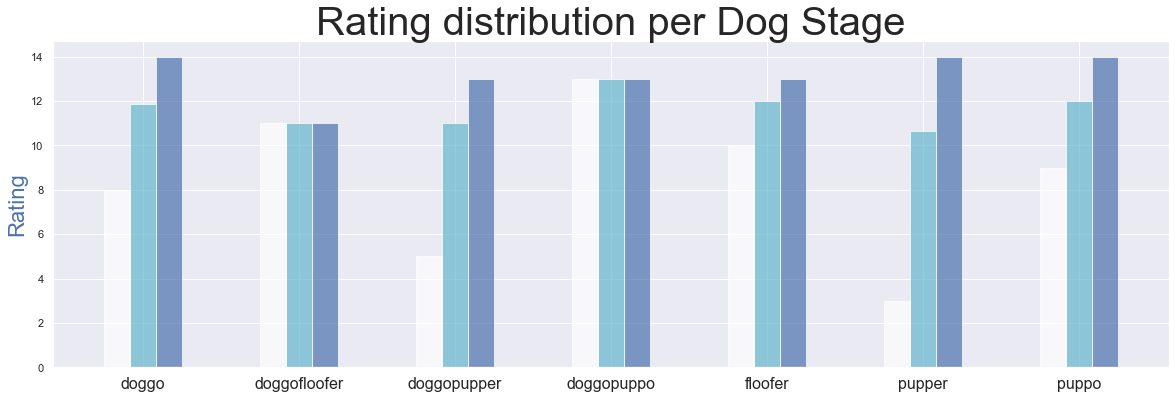

In [92]:
stage =  df1.groupby(['dog_stages'],as_index = True)
ind = np.arange(len(stage))  # the x locations for the groups
width = 0.5       # the width of the bars
labels =stage['rating_numerator'].count().index

stage_rating_max = stage ['rating_numerator'].max()
stage_rating_mean = stage['rating_numerator'].mean()
stage_rating_min =stage['rating_numerator'].min()

plt.figure(figsize=(20,6))

plt.bar(ind+width/3,stage_rating_max,color= 'b',  width= width/3, alpha = .7);
plt.bar(ind,stage_rating_mean,color= 'c', width= width/3, alpha = .7);
plt.bar(ind-width/3,stage_rating_min,color= 'w', width= width/3, alpha = .7);


plt.title('Rating distribution per Dog Stage',size = 40)
plt.ylabel('Rating' ,color='b', size=22);
plt.xticks(ticks= ind, labels=labels, fontsize=16);

## The previous figure show "rating distribution" for each "dog stage", though we could not compar each stage to others because the "rating count" not involved in our calculation.

## ie. the mean of "doggopuppo" the highest while the "pupper" is the lowest, then if we get each stage rating count relative to the total stages rating count into our calculation as a proportional factor we realize that the relative mean of "doggopuppo" the lowest while for the "pupper" is the highest.

## Next figure will introduce proportional factor into calculation. 
## But befor move forward I would represent another sight. Have a look at "doggopuppo" and "doggofloofer" distribution there is no "Variance". The "max", "min", and "mean" all have the same value. that give us intuation about the data beneath bars, I guess its only one observation. let's check it out.

In [93]:
stage['rating_numerator'].count()

dog_stages
doggo            62
doggofloofer      1
doggopupper       8
doggopuppo        1
floofer           7
pupper          201
puppo            22
Name: rating_numerator, dtype: int64

## That's what I am talking about. Both stages "doggopuppo" and "doggofloofer" only have one observation.

----------------------------------------------------------------------------------------------------------------------------------------



## Let's move forward and check "Relative Mean Rating".

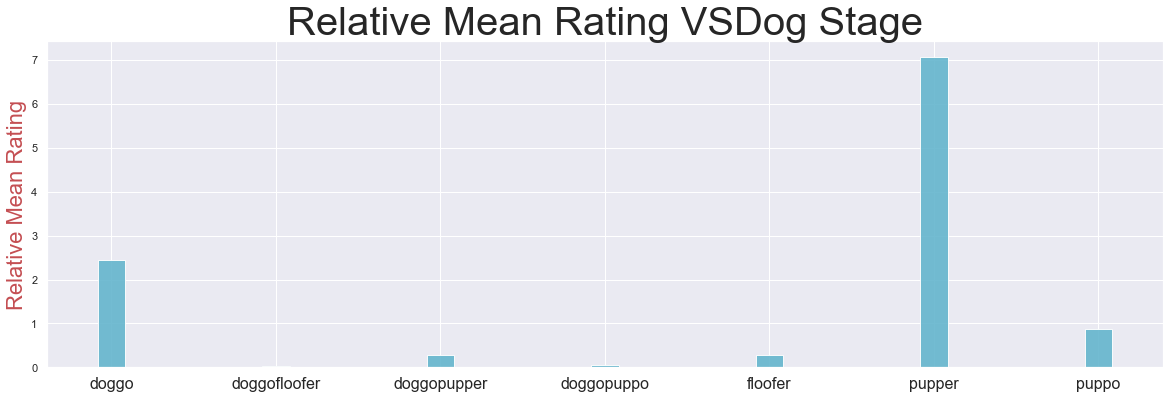

In [94]:
stage_rating_count = stage.rating_numerator.count()

total_rating_count =stage.rating_numerator.count().sum()

proportion = stage_rating_count/total_rating_count

stage_rating_proportion = stage_rating_mean * proportion

plt.figure(figsize=(20,6))

plt.bar(ind,stage_rating_proportion,color='c', width=width/3,alpha=.9);

plt.title('Relative Mean Rating VSDog Stage',size = 40)
plt.ylabel('Relative Mean Rating' ,color='r', size=22);
plt.xticks(ticks= ind, labels=labels, fontsize=16);

## Here it is, the Relative Mean Rating which you can compare stages to each other.
## That prove the point we mentioned early the relative mean of "doggopuppo" the lowest while for the "pupper" is the highest.

--------------------------------------------------------------------------------------------------------------------------------------

## In the next will examine the Favorite and Retweets for each stage but with `.sum` which will represent actual count of observation in another word no need to get the proportional ratio, henc it will represented directly.

In [95]:
 stage ['favorite_count'].sum()

dog_stages
doggo           1138255
doggofloofer      15452
doggopupper      106097
doggopuppo        43418
floofer           81983
pupper          1312025
puppo            448441
Name: favorite_count, dtype: int64

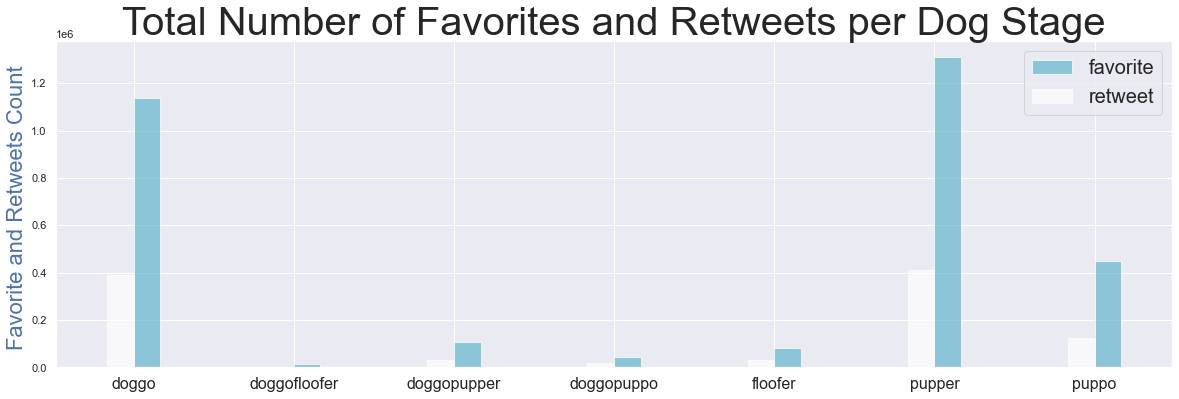

In [96]:
stage_total_favorite = stage ['favorite_count'].sum()

stage_total_retweet = stage['retweet_count'].sum()

plt.figure(figsize=(20,6))

plt.bar(ind+width/6,stage_total_favorite,color='c', width=width/3,alpha=.7,label='favorite');
plt.bar(ind-width/6,stage_total_retweet,color='w', width=width/3,alpha=.7,label='retweet');

plt.title('Total Number of Favorites and Retweets per Dog Stage',size = 40)
plt.ylabel('Favorite and Retweets Count ' ,color='b', size=22);
plt.xticks(ticks= ind, labels=labels, fontsize=16);
plt.legend(fontsize=20);

## Same data with diffrent visuelisation

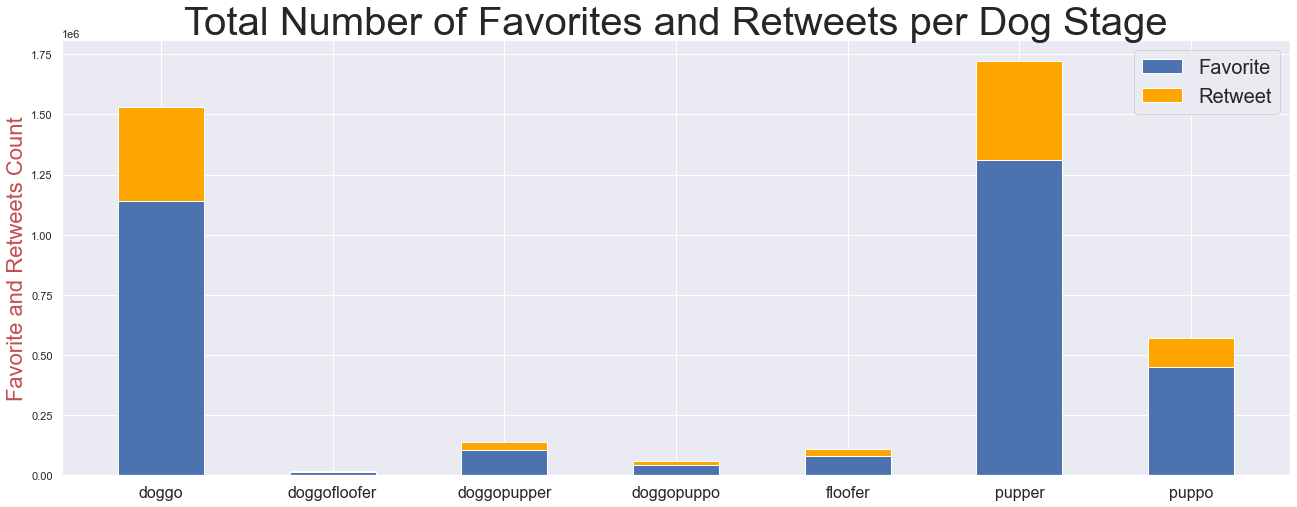

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(22, 8)
ax.bar(labels, stage_total_favorite, width, label='Favorite')
ax.bar(labels, stage_total_retweet, width, bottom=stage_total_favorite,label='Retweet',color='orange')

plt.title('Total Number of Favorites and Retweets per Dog Stage',size = 40)
plt.ylabel('Favorite and Retweets Count' ,color='r', size=22);
plt.xticks(ticks= ind, labels=labels, fontsize=16);
plt.legend(fontsize=20);

plt.show()

---------------------------------------------------------------------------------------------------------------------------------------


## Now How is the interaction? is people get intersted with page posts and contents? and is it growth over time or not?
## All these question could be answerd via the interaction over time which figure out the people engagement.

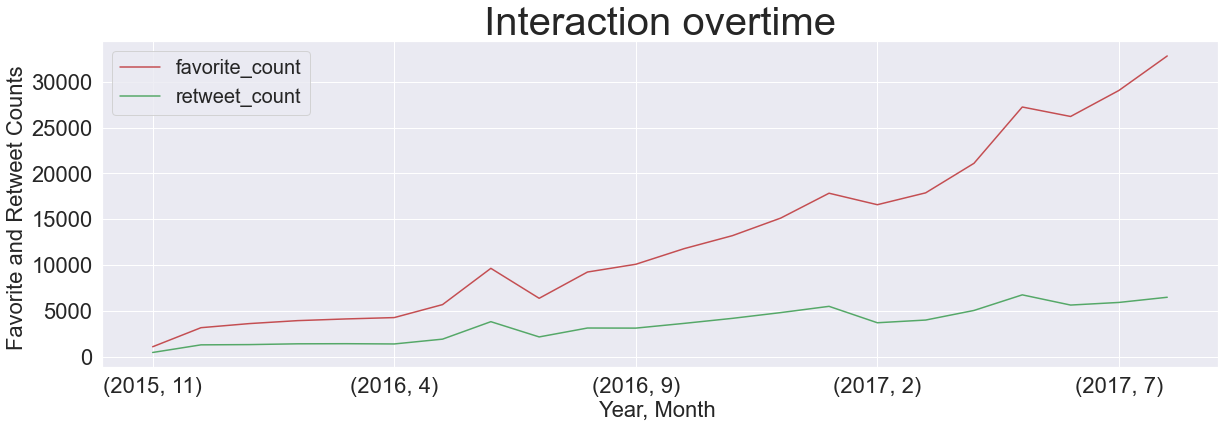

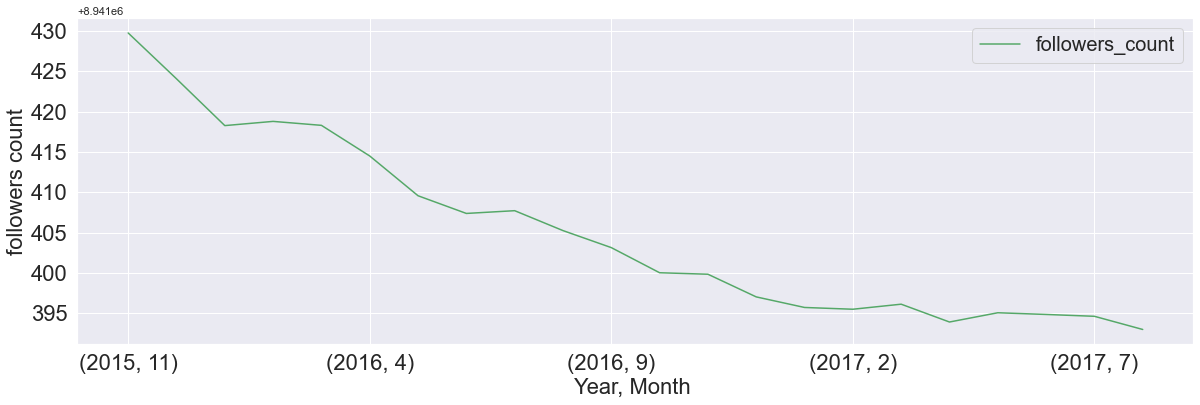

In [98]:
df1['year']=df1['timestamp'].dt.year
df1['month']=df1['timestamp'].dt.month
time = df1.groupby(['year','month'],as_index = True)
fav_time = time['favorite_count'].mean()
ret_time = time['retweet_count'].mean()
fol_time = time['followers_count'].mean()

plt.figure(figsize=(20,6))

fav_time.plot(kind='line',color='r',fontsize=22)
ret_time.plot(kind='line',color='g',fontsize=22)


plt.title(' Interaction overtime ',size = 40)
plt.ylabel('Favorite and Retweet Counts ' , size=22);
plt.xlabel('Year, Month ' , size=22);
plt.legend(fontsize=20);

plt.figure(figsize=(20,6))
fol_time.plot(kind='line',color='g',fontsize=22)

plt.ylabel('followers count' , size=22);
plt.xlabel('Year, Month ' , size=22);
plt.legend(fontsize=20);



# people interaction 
## The Peopel interaction via favorits and retweets is growing as shown in the first figure. Notice that favorites always more than retweets that because less people have intersted in writing posts, while most of them like and go.
## in the other hand we see the followers count over time descending!! is that wierd? what does it mean?
## Don't confuse, it's concept of a new-follwer. Early all people was a new follower who can hit follow. Then after aperiod of time as the number of follwers increased the new followers will decreased. Make sense


---------------------------------------------------------------------------------------------------------------------------------------

# Image Prediction 
## In the following figure we Examin the second data set which show the confident destribution for various prediction level.
## clearly it show that the first prediction has the most confident level 

In [99]:
image = df2.groupby(['prediction_level'],as_index = True)
ind2 = np.arange(len(image))  # the x locations for the groups
width2 = 0.5     # the width of the bars
labels2 =image['prediction_level'].max().index

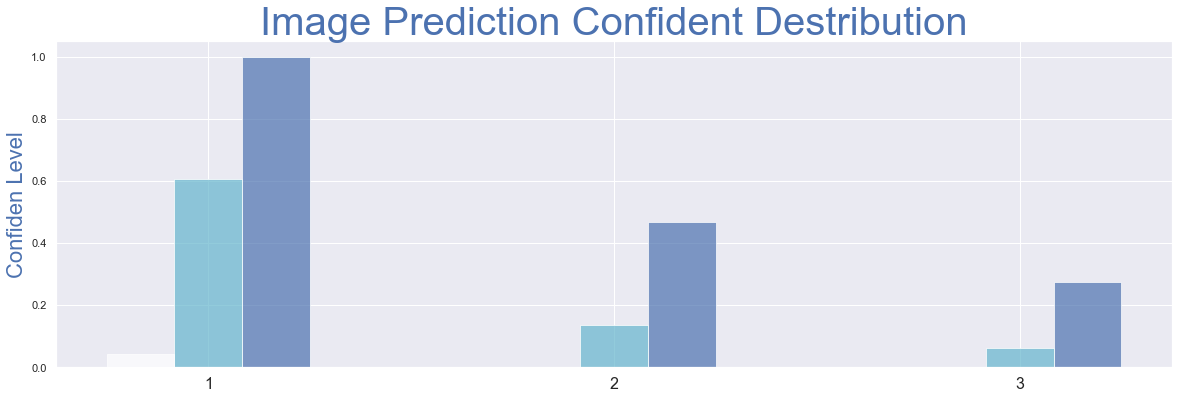

In [100]:
max_conf=image.confidence.max()
mean_conf=image.confidence.mean()
min_conf=image.confidence.min()

plt.figure(figsize=(20,6))

plt.bar(ind2+width2/3,max_conf,color= 'b',  width= width2/3,alpha=.7);
plt.bar(ind2,mean_conf,color='c', width=width2/3,alpha=.7);
plt.bar(ind2-width2/3,min_conf,color='w', width=width2/3,alpha=.7);

plt.title('Image Prediction Confident Destribution',color='b',size = 40)
plt.ylabel('Confiden Level' ,color='b', size=22);
plt.xticks(ticks= ind2, labels=labels2, fontsize=16);

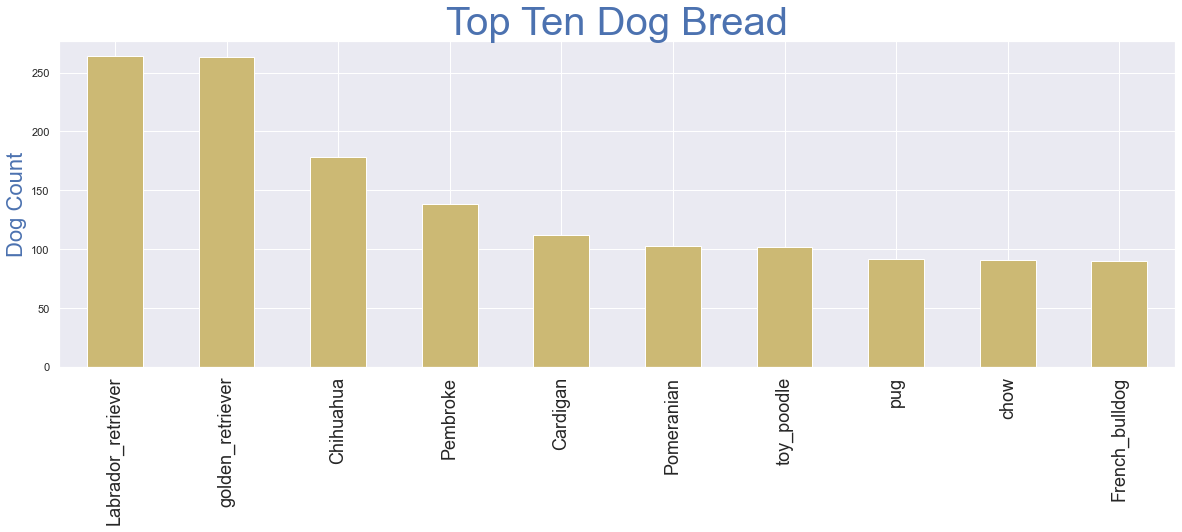

In [101]:
plt.figure(figsize=(20,6))
df2.prediction.value_counts()[np.arange(10)].plot(kind = 'bar', color= 'y');
xlabels = df2.prediction.value_counts()[np.arange(10)].index

plt.title('Top Ten Dog Bread',color='b',size = 40)
plt.ylabel('Dog Count' ,color='b', size=22);
plt.xticks(ticks=np.arange(10), labels= xlabels, fontsize=18);

## Here the top 10 dog bread commonly shared over the page and people interact with